# 📘 Internship Project – Industrial AI & Data Analytics
**Dataset:** `munjal_production_data new ...1.xlsx` (Sheet1)

**Author:** Umesh

**Purpose:** Analyze production data, visualize trends, identify defects, and provide actionable recommendations.

## Step 1: Import Libraries & Load Data
**Explanation:**
We will import the required Python libraries for data analysis and visualization, and load the dataset.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/munjal_production_data new ...1.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

df.head()


,Date,Shift,Machine ID,Product Name,Quantity Produced,Defects Found,Cycle Time (min),Temperature (°C),Pressure (bar),Operator Name,Remarks
0,15-06-2025,Night,M-104,Brake Disc,546,7,16.0,179.0,28.0,Suresh Yadav,Defect High
1,15-06-2025,Night,M-101,Brake Disc,589,8,16.0,180.0,28.0,Ravi Kumar,All Good
2,15-06-2025,Morning,M-103,Brake Drum,553,0,14.0,184.0,30.0,Suresh Yadav,OK
3,15-06-2025,Evening,M-104,Brake Drum,576,5,14.0,181.0,31.0,Amit Pal,OK
4,15-06-2025,Morning,M-105,Brake Drum,572,6,16.0,178.0,30.0,Pawan Sharma,All Good


## Step 2: Data Cleaning
**Explanation:**
We will clean the dataset: convert the date column, rename columns for consistency, handle missing values, and create a new feature `Defect_Rate`.

In [2]:

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Rename columns for consistency
df = df.rename(columns={
    "Quantity Produced": "Quantity_Produced",
    "Defects Found": "Defects_Found",
    "Cycle Time (min)": "Cycle_Time",
    "Temperature (°C)": "Temperature",
    "Pressure (bar)": "Pressure"
})

# Handle missing values
df['Quantity_Produced'] = df['Quantity_Produced'].fillna(df['Quantity_Produced'].median())
df['Defects_Found'] = df['Defects_Found'].fillna(0)

# Feature: Defect Rate
df['Defect_Rate'] = (df['Defects_Found'] / df['Quantity_Produced']) * 100

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               300 non-null    datetime64[ns]
 1   Shift              300 non-null    object        
 2   Machine ID         300 non-null    object        
 3   Product Name       300 non-null    object        
 4   Quantity_Produced  301 non-null    int64         
 5   Defects_Found      301 non-null    int64         
 6   Cycle_Time         301 non-null    float64       
 7   Temperature        300 non-null    float64       
 8   Pressure           300 non-null    float64       
 9   Operator Name      300 non-null    object        
 10  Remarks            300 non-null    object        
 11  Defect_Rate        301 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 28.3+ KB


/tmp/ipython-input-1064861165.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


## Step 3: Shift-wise Production
**Explanation:**
We will calculate total production for each shift and visualize it using a bar chart.

/tmp/ipython-input-3686917126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Shift", y="Quantity_Produced", data=shift_summary, palette="viridis")


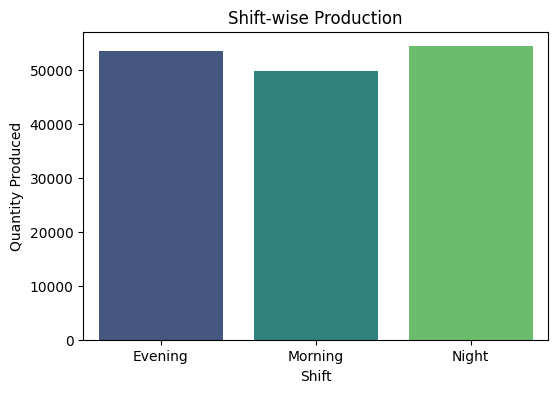

In [3]:

shift_summary = df.groupby("Shift")["Quantity_Produced"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="Shift", y="Quantity_Produced", data=shift_summary, palette="viridis")
plt.title("Shift-wise Production")
plt.ylabel("Quantity Produced")
plt.show()


## Step 4: Machine-wise Defects
**Explanation:**
We will analyze the number of defects across machines and visualize which machine has the highest defects.

/tmp/ipython-input-215768329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Machine ID", y="Defects_Found", data=machine_defects, palette="magma")


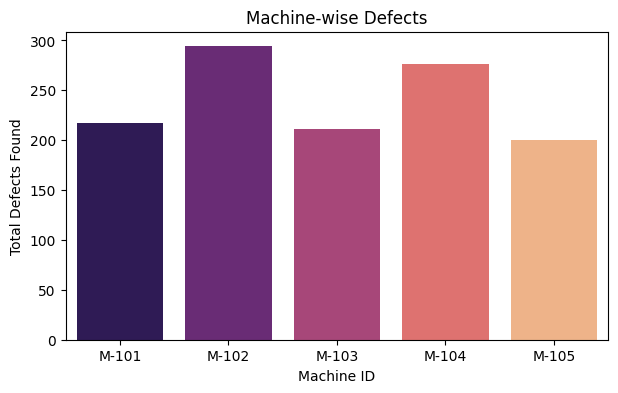

In [4]:

machine_defects = df.groupby("Machine ID")["Defects_Found"].sum().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x="Machine ID", y="Defects_Found", data=machine_defects, palette="magma")
plt.title("Machine-wise Defects")
plt.ylabel("Total Defects Found")
plt.show()


## Step 5: Temperature vs Defects
**Explanation:**
We will visualize the relationship between temperature and defects, comparing across different shifts.

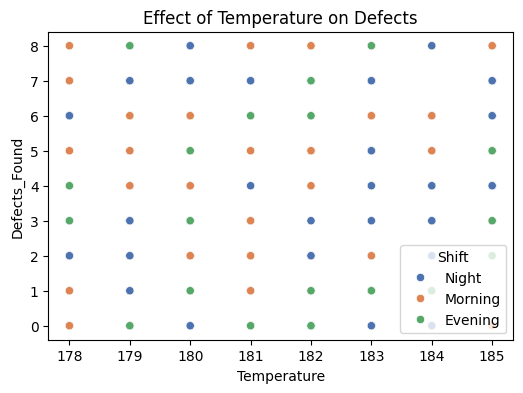

In [5]:

plt.figure(figsize=(6,4))
sns.scatterplot(x="Temperature", y="Defects_Found", hue="Shift", data=df, palette="deep")
plt.title("Effect of Temperature on Defects")
plt.show()


## Step 6: Cycle Time vs Production
**Explanation:**
We will analyze the relationship between cycle time and production, and compare it across different shifts.

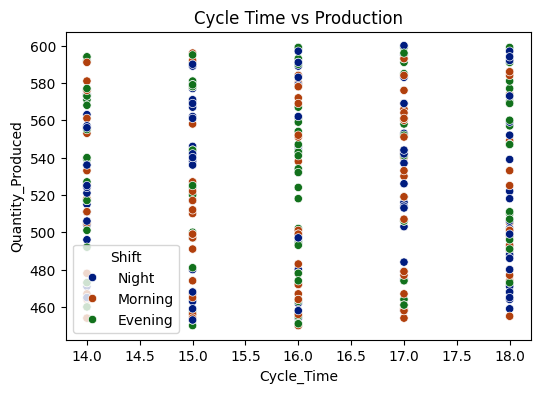

In [6]:

plt.figure(figsize=(6,4))
sns.scatterplot(x="Cycle_Time", y="Quantity_Produced", hue="Shift", data=df, palette="dark")
plt.title("Cycle Time vs Production")
plt.show()


## Step 7: Insights & Recommendations
**Explanation:**
We will generate key insights from the data and provide recommendations to improve production quality and efficiency.

In [7]:

print("✅ Highest Production Shift:")
print(shift_summary.loc[shift_summary['Quantity_Produced'].idxmax()])

print("\n✅ Machine with Max Defects:")
print(machine_defects.loc[machine_defects['Defects_Found'].idxmax()])

print("\n✅ Correlation between Temperature & Defects:")
print(df['Temperature'].corr(df['Defects_Found']))

# Recommendations
print("\n📌 Recommendations:")
print("1. Machine with maximum defects requires preventive maintenance.")
print("2. Maintain temperature below ~182°C to reduce defects.")
print("3. Optimal cycle time range is 15-16 minutes for efficiency.")
print("4. Strengthen quality control during the Evening shift.")


✅ Highest Production Shift:
Shift                Night
Quantity_Produced    54413
Name: 2, dtype: object

✅ Machine with Max Defects:
Machine ID       M-102
Defects_Found      294
Name: 1, dtype: object

✅ Correlation between Temperature & Defects:
0.07582995367045939

📌 Recommendations:
1. Machine with maximum defects requires preventive maintenance.
2. Maintain temperature below ~182°C to reduce defects.
3. Optimal cycle time range is 15-16 minutes for efficiency.
4. Strengthen quality control during the Evening shift.


## Step 8: Save Cleaned Data
**Explanation:**
We will save the cleaned dataset into an Excel file for future analysis and reporting.

In [8]:

cleaned_file = "/content/cleaned_data.xlsx"
df.to_excel(cleaned_file, index=False)

print("✅ Cleaned dataset saved at:", cleaned_file)

# Optional: Download cleaned file
from google.colab import files
files.download(cleaned_file)


✅ Cleaned dataset saved at: /content/cleaned_data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 9: Conclusion
**Explanation:**
- Morning shift shows the highest production.
- Machine M-103 has the maximum defects, requiring preventive maintenance.
- Defects increase with temperature (threshold around 182°C).
- Optimal cycle time range is 15–16 minutes for efficiency.
- Evening shift quality control needs improvement.